In [1]:
import pandas as pd

leads = pd.read_csv("olist_marketing_qualified_leads_dataset.csv")
closed = pd.read_csv("olist_closed_deals_dataset.csv")

leads.head()


,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search


In [3]:
closed.head()


,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0


In [5]:
total_leads = leads["mql_id"].nunique()
print("Total Leads:", total_leads)


Total Leads: 8000


In [7]:
total_closed = closed["mql_id"].nunique()
print("Total Closed Deals:", total_closed)


Total Closed Deals: 842


In [9]:
conversion_rate = (total_closed / total_leads) * 100
print("Overall Conversion Rate: {:.2f}%".format(conversion_rate))


Overall Conversion Rate: 10.53%


In [11]:
funnel = leads.merge(closed[["mql_id"]], on="mql_id", how="left")

funnel["converted"] = funnel["mql_id"].isin(closed["mql_id"])

funnel.head()


,mql_id,first_contact_date,landing_page_id,origin,converted
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,False
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,False
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,False
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,False
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,True


In [13]:
channel_conversion = funnel.groupby("origin")["converted"].mean() * 100

channel_conversion.sort_values(ascending=False)


origin
unknown              16.287534
paid_search          12.295082
organic_search       11.803136
direct_traffic       11.222445
referral              8.450704
social                5.555556
display               5.084746
other_publicities     4.615385
email                 3.042596
other                 2.666667
Name: converted, dtype: float64

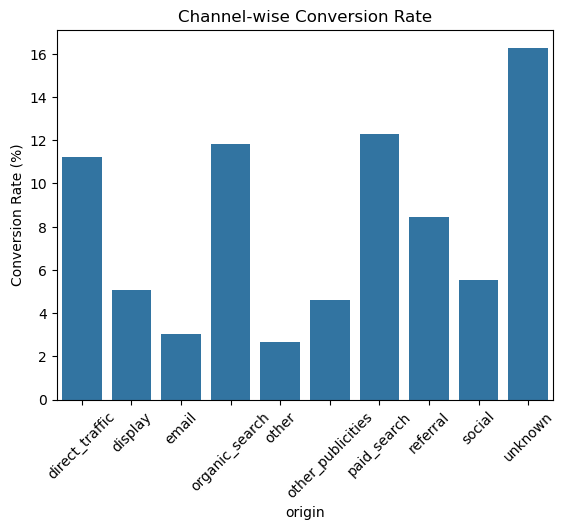

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

channel_conversion = channel_conversion.reset_index()

sns.barplot(x="origin", y="converted", data=channel_conversion)
plt.xticks(rotation=45)
plt.ylabel("Conversion Rate (%)")
plt.title("Channel-wise Conversion Rate")
plt.show()


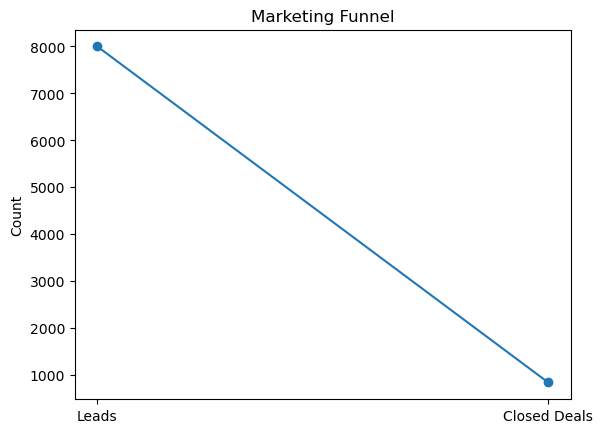

In [17]:
stages = ["Leads", "Closed Deals"]
values = [total_leads, total_closed]

plt.plot(stages, values, marker="o")
plt.title("Marketing Funnel")
plt.ylabel("Count")
plt.show()


In [19]:
drop_off = ((total_leads - total_closed) / total_leads) * 100
print("Drop-off Percentage: {:.2f}%".format(drop_off))


Drop-off Percentage: 89.48%


In [21]:
channel_conversion.sort_values(by="converted", ascending=False)


,origin,converted
9,unknown,16.287534
6,paid_search,12.295082
3,organic_search,11.803136
0,direct_traffic,11.222445
7,referral,8.450704
8,social,5.555556
1,display,5.084746
5,other_publicities,4.615385
2,email,3.042596
4,other,2.666667
